In [17]:
from pymongo import MongoClient
import pandas as pd
import base64
from IPython.display import Image, display

client = MongoClient('mongodb+srv://leduyanh:1@cluster0.z0bblpv.mongodb.net/')
db = client['laptop_database']
collection = db['products']
data = collection.find()
document = collection.find_one({})


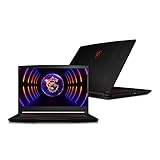

In [18]:
#Truy xuất ảnh từ mongodb
image_data = document['Image']
encoded_image = base64.b64encode(image_data).decode('utf-8')
display(Image(url=f"data:image/jpeg;base64,{encoded_image}"))

In [28]:
import pandas as pd

# Đọc file CSV
df = pd.read_csv('../laptop_data.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18253 entries, 0 to 18252
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   _id                             18253 non-null  object
 1   Processor (CPU)                 18063 non-null  object
 2   Graphics card (GPU)             13223 non-null  object
 3   Memory (RAM)                    17887 non-null  object
 4   Screen size                     18252 non-null  object
 5   Screen resolution               17407 non-null  object
 6   Weight                          17251 non-null  object
 7   Hard drives                     17910 non-null  object
 8   Size (length x width x height)  16396 non-null  object
 9   Operating system (OS)           17110 non-null  object
 10  Release date                    18253 non-null  object
 11  Amazon.com Lowest New Price     18109 non-null  object
 12  Name                            18253 non-null

In [29]:
df.head()

,_id,Processor (CPU),Graphics card (GPU),Memory (RAM),Screen size,Screen resolution,Weight,Hard drives,Size (length x width x height),Operating system (OS),Release date,Amazon.com Lowest New Price,Name
0,658930870ec2a45a19bcb27a,Intel Core i7-12650H,GeForce RTX 3050See more GeForce RTX 3050 laptops,16gb,15.6″See more 15.6″ laptops,Full HD(1920 x 1080 pixels),4.1 lbs(1.86 kg),1000gb SSD,14.13 x 9.99 x 0.85 inches,Windows 11 Home,"November 18, 2023",$979.00,EXcaliberPC MSI 15″ (Thin)
1,658930870ec2a45a19bcb27d,Intel Core i5-1135G7,Intel Iris XeSee more Intel Iris Xe laptops,12gb,15.6″See more 15.6″ laptops,Full HD(1920 x 1080 pixels),3.75 lbs(1.7 kg),250gb SSD,14.26 x 9.98 x 0.78 inches,Windows 11 Home,"February 25, 2022",$554.99,Lenovo IdeaPad 3 15″ (IdeaPad)
2,658930870ec2a45a19bcb27e,AMD Ryzen 7 5700U,NaN,16gb,14″See more 14″ laptops,Quad HD(2560 x 1440 pixels),3.42 lbs(1.55 kg),1000gb SSD,12.32 x 8.85 x 0.7 inches,Windows 11 Pro,"August 5, 2023",$788.99,Lenovo Flex 5 14″ (Flex)
3,658930870ec2a45a19bcb280,Intel Core i7-1165G7,NaN,32gb,17.3″See more 17.3″ laptops,Full HD(1920 x 1080 pixels),NaN,500gb SSD,NaN,Windows 11 Pro,"March 12, 2022","$1,249.00",HP Envy 17″
4,658930870ec2a45a19bcb281,Intel Core i7-12700H,GeForce RTX 3070 TiSee more GeForce RTX 3070 T...,64gb,16″See more 16″ laptops,WQUXGA(3840 x 2400 pixels),5 lbs(2.27 kg),2000gb SSD,14.02 x 9.78 x 0.88 inches,Windows 11 Pro,"April 18, 2023","$2,364.00",Gigabyte AERO 16


In [30]:
# Xử lý weight
import numpy as np
def convert_to_kg(weight):
    if pd.isna(weight):
        return np.nan
    try:
        return float(weight.split('(')[1].split(' ')[0])
    except (IndexError, ValueError):
        return np.nan
    
df['Weight'] = df['Weight'].apply(convert_to_kg)
df.head()

,_id,Processor (CPU),Graphics card (GPU),Memory (RAM),Screen size,Screen resolution,Weight,Hard drives,Size (length x width x height),Operating system (OS),Release date,Amazon.com Lowest New Price,Name
0,658930870ec2a45a19bcb27a,Intel Core i7-12650H,GeForce RTX 3050See more GeForce RTX 3050 laptops,16gb,15.6″See more 15.6″ laptops,Full HD(1920 x 1080 pixels),1.86,1000gb SSD,14.13 x 9.99 x 0.85 inches,Windows 11 Home,"November 18, 2023",$979.00,EXcaliberPC MSI 15″ (Thin)
1,658930870ec2a45a19bcb27d,Intel Core i5-1135G7,Intel Iris XeSee more Intel Iris Xe laptops,12gb,15.6″See more 15.6″ laptops,Full HD(1920 x 1080 pixels),1.70,250gb SSD,14.26 x 9.98 x 0.78 inches,Windows 11 Home,"February 25, 2022",$554.99,Lenovo IdeaPad 3 15″ (IdeaPad)
2,658930870ec2a45a19bcb27e,AMD Ryzen 7 5700U,NaN,16gb,14″See more 14″ laptops,Quad HD(2560 x 1440 pixels),1.55,1000gb SSD,12.32 x 8.85 x 0.7 inches,Windows 11 Pro,"August 5, 2023",$788.99,Lenovo Flex 5 14″ (Flex)
3,658930870ec2a45a19bcb280,Intel Core i7-1165G7,NaN,32gb,17.3″See more 17.3″ laptops,Full HD(1920 x 1080 pixels),NaN,500gb SSD,NaN,Windows 11 Pro,"March 12, 2022","$1,249.00",HP Envy 17″
4,658930870ec2a45a19bcb281,Intel Core i7-12700H,GeForce RTX 3070 TiSee more GeForce RTX 3070 T...,64gb,16″See more 16″ laptops,WQUXGA(3840 x 2400 pixels),2.27,2000gb SSD,14.02 x 9.78 x 0.88 inches,Windows 11 Pro,"April 18, 2023","$2,364.00",Gigabyte AERO 16
